In [ ]:
#Introdution to Regression with Neural Network in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


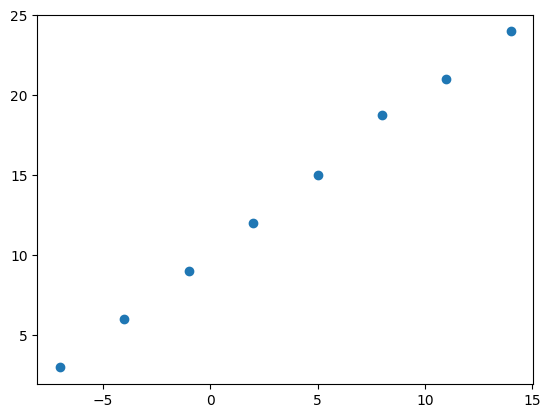

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.8, 21.0, 24.0])

#visualize it
plt.scatter(X,y);

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True, False,  True,  True])

In [6]:
#create a demo tensor for our house prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [11]:
#turn our Numpy array into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3. ,  6. ,  9. , 12. , 15. , 18.8, 21. , 24. ], dtype=float32)>)

In [12]:
#Set random seed
tf.random.set_seed(42)
# 1. create a model using the Sequential Api
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# 3. Fit the model error
#model.fit(X,y, epochs=5)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated

Epoch 1/5
1/1 [==============================] - 0s 365ms/step - loss: 11.4952 - mae: 11.4952
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3627 - mae: 11.3627
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2302 - mae: 11.2302
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 11.0977 - mae: 11.0977
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9652 - mae: 10.9652


In [13]:
# check the X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3. ,  6. ,  9. , 12. , 15. , 18.8, 21. , 24. ], dtype=float32)>)

In [16]:
y_pred = model.predict([17.0])
y_pred


1/1 [==============================] - 0s 50ms/step


array([[13.248301]], dtype=float32)

In [21]:
#improving that model

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated

Epoch 1/100
1/1 [==============================] - 1s 630ms/step - loss: 13.9724 - mae: 13.9724
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5953 - mae: 13.5953
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2578 - mae: 13.2578
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9515 - mae: 12.9515
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6301 - mae: 12.6301
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.2826 - mae: 12.2826
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8897 - mae: 11.8897
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4442 - mae: 11.4442
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9211 - mae: 10.9211
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.3018 - mae: 10.3018
Epoch 11/100
1/1 [==============================

In [22]:
# prediction improved??
model.predict([17.0])

1/1 [==============================] - 0s 126ms/step


array([[33.43987]], dtype=float32)

In [26]:
#improving that model

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated

Epoch 1/100
1/1 [==============================] - 1s 541ms/step - loss: 14.0962 - mae: 14.0962
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 13.3960 - mae: 13.3960
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6958 - mae: 12.6958
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9937 - mae: 11.9937
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2879 - mae: 11.2879
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5764 - mae: 10.5764
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8567 - mae: 9.8567
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1257 - mae: 9.1257
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3806 - mae: 8.3806
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6190 - mae: 7.6190
Epoch 11/100
1/1 [==============================] - 0s 10ms/s

In [27]:
# prediction improved??
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[28.113977]], dtype=float32)

In [ ]:
#Evaluating the Model